In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [2]:
def get_reward(action):
    return np.random.normal(arms_mean[action], 1)

def update_Q_incrementaly(Q, reward, n):
    return Q + (reward - Q) / n

def update_Q_fixed_interval(alpha, Q1, rewards):
    s = 0
    for i, R in enumerate(rewards):
        s += alpha*((1-alpha)**(len(rewards)-i))*R
    return (1-alpha)**len(rewards) * Q1 + s

In [3]:
def run_incrementaly(e, arms, n_steps=1000, n_iters=2000):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    iters = 0
    
    print("run e=%f"%e)

    while iters < n_iters:

        if iters % 100 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.zeros(10)
        ns = np.zeros(10)

        while steps < n_steps:
            if np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)

            reward = get_reward(A)
            ns[A] += 1
            Qs[A] = update_Q_incrementaly(Qs[A], reward, ns[A])

            rewards[steps] += reward
            
            steps += 1
            arms += np.random.normal(0, 0.01, 10)
            
            
        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    
    return rewards/n_iters

In [4]:
arms_mean = np.zeros(10)
result_incremental = run_incrementaly(0.1, arms_mean, 1000, 200)

run e=0.100000
0/200 iters
100/200 iters
done in 33.663503s 



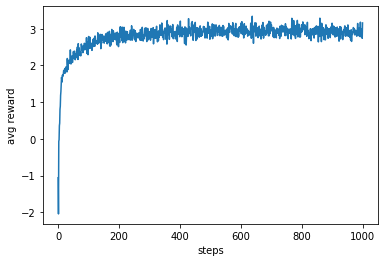

In [5]:
plt.plot(range(1000), result_incremental)

plt.xlabel("steps")
plt.ylabel("avg reward")

plt.show()

In [6]:
def run_fixed_interval(e, arms, n_steps=1000, n_iters=2000):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    iters = 0
    
    print("run e=%f"%e)

    while iters < n_iters:

        if iters % 10 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.zeros(10)
        ns = np.zeros(10)

        while steps < n_steps:
            if np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)

            reward = get_reward(A)
            ns[A] += 1
            Qs[A] = update_Q_fixed_interval(0.1, 0, rewards[:steps])

            rewards[steps] += reward
            
            steps += 1
            arms += np.random.normal(0, 0.01, 10)
            
            
        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    
    return rewards/n_iters

In [7]:
arms_mean = np.zeros(10)
result_fixed_interval = run_fixed_interval(0.1, arms_mean, 1000, 200)

NameError: name 'arms' is not defined

In [ ]:
plt.plot(range(1000), result_fixed_interval)

plt.xlabel("steps")
plt.ylabel("avg reward")

plt.show()